- Import Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

- Load and Inspect the Data

In [268]:
df= pd.read_csv("healthcare_dataset.csv")
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [269]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

- Data Cleaning

In [226]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [227]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower().str.capitalize()

In [228]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew smith,Sons and miller,Blue cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha davies,Kim inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany mitchell,Cook plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin wells,"Hernandez rogers and vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen hanna,White-white,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


- Database Setup

In [229]:
conn = sqlite3.connect('clinic.db')
df.to_sql('clinic', conn, if_exists='replace', index=False)

55500

In [230]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew smith,Sons and miller,Blue cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha davies,Kim inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany mitchell,Cook plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin wells,"Hernandez rogers and vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne bell,43,Female,Ab+,Cancer,2022-09-19,Kathleen hanna,White-white,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [231]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

- Create patients table 

In [232]:
patients_df=df[['Name', 'Age','Gender', 'Blood Type']].drop_duplicates()
patients_df = patients_df.reset_index(drop = True)
patients_df.insert(0, 'patient_id', patients_df.index+1)
patients_df.to_sql('patients', conn, index=False, if_exists= 'replace')

54944

In [233]:
patients_df.head()

,patient_id,Name,Age,Gender,Blood Type
0,1,Bobby jackson,30,Male,B-
1,2,Leslie terry,62,Male,A+
2,3,Danny smith,76,Female,A-
3,4,Andrew watts,28,Female,O+
4,5,Adrienne bell,43,Female,Ab+


- How Many of each gender have been admited

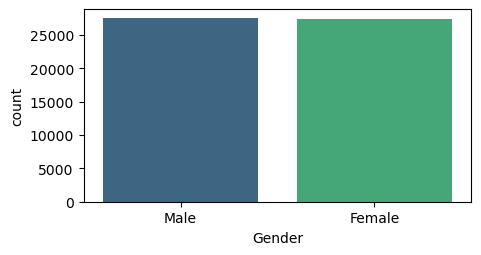

,Gender,Total
0,Female,27458
1,Male,27486


In [234]:
plt.figure(figsize=(5,2.5))
sns.countplot(data=patients_df,x='Gender',palette='viridis')
plt.show()

pd.read_sql_query("""
select Gender , Count(Gender)As Total from Patients 
Group by Gender
""",conn)

- Grouped by blood type

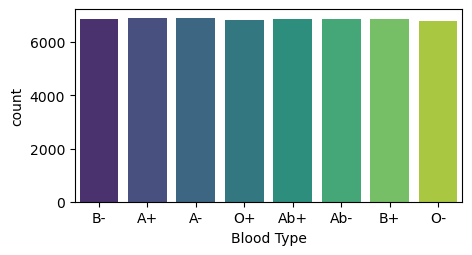

,Blood Type,Total
0,A+,6894
1,A-,6896
2,Ab+,6881
3,Ab-,6871
4,B+,6883
5,B-,6868
6,O+,6851
7,O-,6800


In [235]:
plt.figure(figsize=(5,2.5))
sns.countplot(data=patients_df,x='Blood Type',palette='viridis')
plt.show()
pd.read_sql_query("""
select "Blood Type" ,count("Blood Type") as Total from Patients
group by "Blood Type"
""", conn)

- Finding maximum and average age of patient admitted.

In [246]:
pd.read_sql_query("""
select Max(Age) as "Maximum Age", round(Avg(Age),0) as "Averge Age" from Patients 
""",conn)

,Maximum Age,Averge Age
0,89,52.0


- Calculating Patients Hospitalized Age-wise from Maximum to Minimum


In [247]:
pd.read_sql_query("""
select Age, count(Age) as Total from Patients
group by Age
order by Age desc 
""",conn)

,Age,Total
0,89,8
1,88,25
2,87,31
3,86,41
4,85,734
...,...,...
72,17,32
73,16,24
74,15,28
75,14,18


- Ranking Age by Number of Patients Hospitalized

In [248]:
pd.read_sql_query(""" 
select Age,count(Age) as Total, DENSE_RANK() over(order by count(Age) DESC) as Ranking_Admitted 
from patients
group by Age
Having count(Age) > (select avg(Age) from Patients) """, conn)

,Age,Total,Ranking_Admitted
0,38,890,1
1,57,880,2
2,37,878,3
3,34,857,4
4,80,855,5
...,...,...,...
63,32,749,49
64,40,746,50
65,20,744,51
66,39,741,52


- Create Visits table 

In [249]:
visits_df= df[['Name','Medical Condition','Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results']].drop_duplicates()
visits_df=visits_df.reset_index(drop=True)
visits_df.insert(0, 'Visit_id', visits_df.index+1)
visits_df.to_sql('visits', conn, index = False, if_exists='replace')


50000

In [250]:
visits_df.head()

,Visit_id,Name,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby jackson,Cancer,2024-01-31,Matthew smith,Sons and miller,Blue cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,2,Leslie terry,Obesity,2019-08-20,Samantha davies,Kim inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,3,Danny smith,Obesity,2022-09-22,Tiffany mitchell,Cook plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,4,Andrew watts,Diabetes,2020-11-18,Kevin wells,"Hernandez rogers and vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,5,Adrienne bell,Cancer,2022-09-19,Kathleen hanna,White-white,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


- Create a relationship between the patient table and visits table

In [251]:
visits_df = visits_df.merge(patients_df[['patient_id', 'Name']], on ='Name', how ='left' )
visits_df.drop(columns=['Name'], inplace =True)


In [252]:
visits_df.head()

,Visit_id,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,patient_id
0,1,Cancer,2024-01-31,Matthew smith,Sons and miller,Blue cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1
1,2,Obesity,2019-08-20,Samantha davies,Kim inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2
2,3,Obesity,2022-09-22,Tiffany mitchell,Cook plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,3
3,4,Diabetes,2020-11-18,Kevin wells,"Hernandez rogers and vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,4
4,5,Cancer,2022-09-19,Kathleen hanna,White-white,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,5


In [253]:
cols = list(visits_df.columns)
cols.remove('patient_id')
cols.insert(1, 'patient_id')
visits_df = visits_df[cols]
visits_df.head()

,Visit_id,patient_id,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,1,Cancer,2024-01-31,Matthew smith,Sons and miller,Blue cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,2,2,Obesity,2019-08-20,Samantha davies,Kim inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,3,3,Obesity,2022-09-22,Tiffany mitchell,Cook plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,4,4,Diabetes,2020-11-18,Kevin wells,"Hernandez rogers and vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,5,5,Cancer,2022-09-19,Kathleen hanna,White-white,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


- Create Doctor table 

In [254]:
doctor_df = df[['Doctor']].drop_duplicates().reset_index(drop=True)
doctor_df.insert(0, 'doctor_id', doctor_df.index + 1)
doctor_df.to_sql('doctor', conn, index=False, if_exists='replace')
doctor_df.head()

,doctor_id,Doctor
0,1,Matthew smith
1,2,Samantha davies
2,3,Tiffany mitchell
3,4,Kevin wells
4,5,Kathleen hanna


- Most common medical conditions most used Medication to treat it

In [257]:
most_common_conditions=pd.read_sql_query("""
SELECT "Medical Condition" as Condition, Medication ,COUNT(*) AS Usage_count
FROM visits
GROUP BY Condition, Medication
ORDER BY Usage_count DESC limit 10
""", conn) 
most_common_conditions.head()

,Condition,Medication,Usage_count
0,Arthritis,Aspirin,1733
1,Cancer,Lipitor,1725
2,Obesity,Penicillin,1713
3,Asthma,Paracetamol,1705
4,Diabetes,Lipitor,1702


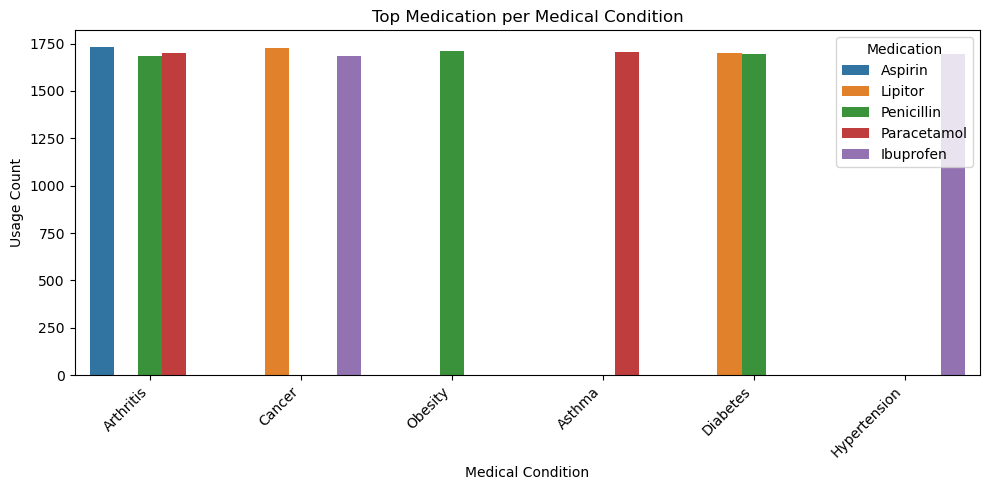

In [258]:
plt.figure(figsize=(10, 5))
sns.barplot(data=most_common_conditions, x="Condition", y="Usage_count", hue='Medication')

plt.title('Top Medication per Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Medication')
plt.show()

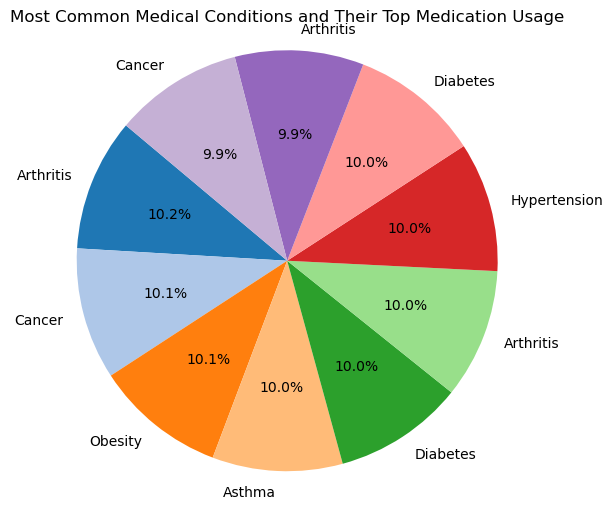

In [259]:
labels = most_common_conditions['Condition']
sizes = most_common_conditions['Usage_count']
colors = plt.cm.tab20.colors[:len(labels)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=140)

plt.title('Most Common Medical Conditions and Their Top Medication Usage')
plt.axis('equal') 

plt.show()


- Most Used Medication

In [279]:
Most_Uesed_Medication = pd.read_sql_query(""" 
SELECT Medication, COUNT(Medication) AS Total 
FROM visits 
GROUP BY Medication
ORDER BY Total DESC
""", conn) 
Most_Uesed_Medication.head()

,Medication,Total
0,Lipitor,10032
1,Ibuprofen,10003
2,Penicillin,9995
3,Aspirin,9992
4,Paracetamol,9978


In [277]:
most_used_med = Most_Uesed_Medication.iloc[0]['Medication']

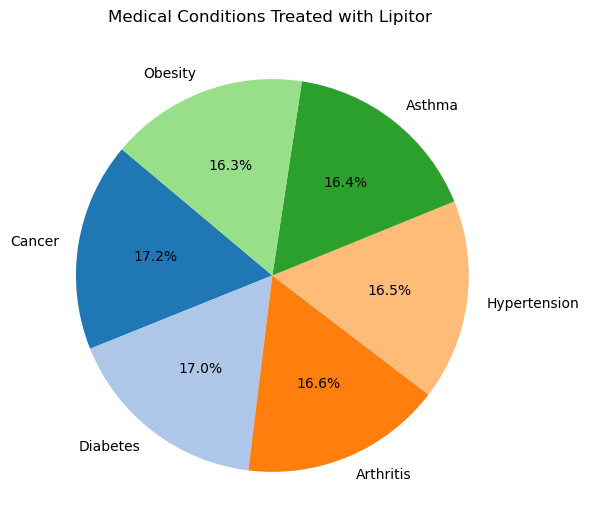

In [278]:
labels = med_conditions['Condition']
sizes = med_conditions['Total']
colors = plt.cm.tab20.colors[:len(labels)] 
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=140)
plt.title(f'Medical Conditions Treated with {most_used_med} ') 
plt.tight_layout()
plt.show()

- Most Common doctor depend on the Visitation 

In [263]:
pd.read_sql_query("""
select Doctor, count(visit_id) as Num_of_Visit From visits
group by Doctor
order by Num_of_Visit Desc limit 10
""", conn)

,Doctor,Num_of_Visit
0,Michael smith,24
1,John smith,21
2,Robert smith,19
3,Michael johnson,19
4,David smith,18
5,Robert johnson,17
6,Michael williams,17
7,James smith,17
8,Matthew smith,16
9,Christopher smith,16


- Most Common Doctor to be Seen for each Medical Condition

In [264]:
top_doctor_per_condition=pd.read_sql_query("""
    WITH RankedDoctors AS (
        SELECT 
            "Medical Condition" AS Condition,
            Doctor,
            COUNT(*) AS Total,
            ROW_NUMBER() OVER (
                PARTITION BY "Medical Condition"
                ORDER BY COUNT(*) DESC
            ) AS rn
        FROM visits
        GROUP BY "Medical Condition", Doctor
    )

    SELECT 
        Condition,
        Doctor,
        Total
    FROM RankedDoctors
    WHERE rn = 1
    ORDER BY Total DESC;
""", conn) 
top_doctor_per_condition.head()

,Condition,Doctor,Total
0,Arthritis,John smith,7
1,Obesity,Andrew williams,6
2,Asthma,Robert smith,5
3,Cancer,Michael smith,5
4,Diabetes,Michael smith,5


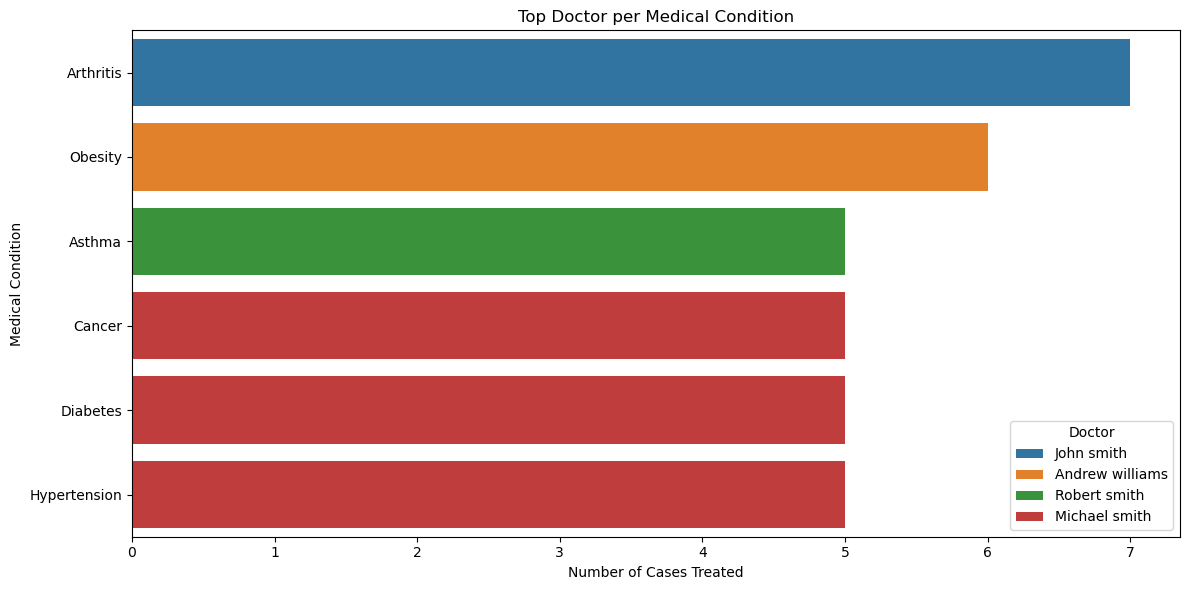

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_doctor_per_condition,
    x='Total',
    y='Condition',
    hue='Doctor',
    dodge=False,
    palette='tab10'
)

plt.title('Top Doctor per Medical Condition')
plt.xlabel('Number of Cases Treated')
plt.ylabel('Medical Condition')
plt.legend(title='Doctor')
plt.tight_layout()
plt.show()


- Average Range of Stay for each Medical Condition

In [266]:
pd.read_sql_query("""
select "Medical Condition", round(AVG(JULIANDAY("Discharge Date") - JULIANDAY("Date of Admission")),0) AS Avg_Stay
FROM visits
WHERE "Discharge Date" IS NOT NULL AND "Date of Admission" IS NOT NULL
group by "Medical Condition"
""", conn)

,Medical Condition,Avg_Stay
0,Arthritis,16.0
1,Asthma,16.0
2,Cancer,15.0
3,Diabetes,15.0
4,Hypertension,15.0
5,Obesity,15.0


- Most preferred Insurance Provide by Patients 

In [267]:
pd.read_sql_query("""
select "Insurance Provider", COUNT("Insurance Provider") as "Most Insurance"
from Visits
group by "Insurance Provider"
order by "Most Insurance" desc
""",conn)

,Insurance Provider,Most Insurance
0,Cigna,10091
1,Medicare,10058
2,Unitedhealthcare,10002
3,Blue cross,10001
4,Aetna,9848



## Summary and Insights

In this project, I worked on a healthcare dataset to explore and understand patient and hospital-related data. I started by cleaning the data and organizing it into separate tables like patients, visits, and doctors to make it easier to analyze.

Using both SQL and Python, I was able to answer important questions like:
- Which gender and blood type are most common among admitted patients.
- What are the most frequent medical conditions and which medications are used to treat them.
- Which doctors see the most patients, and who is the top doctor for each condition.
- What is the average hospital stay for each condition.
- Which insurance providers are most preferred by patients.

One interesting part was identifying the most used medication and automatically analyzing what conditions it's used to treat — which I visualized using pie charts.

Overall, this project helped me practice real-world data analysis skills like cleaning messy data, writing SQL queries, working with relational databases, and creating clear visualizations. It also showed how data can help answer practical healthcare questions.
